# Assignment 1 - Data Collection and Analysis

## Objective

In this assignment, you as a class will collectively record a dataset with elevator arrival times on the ground floor in CDS.
Using this dataset, you will determine the best location to wait in order to minimize the expected walking distance to the next arriving elevator.

Learning goals:

- Practice collecting, interacting, and visualizing data.
- Practice making a hypothesis based on training data and then evaluating it on test data.

This assignment will be graded on a scale of full credit, partial credit, or no credit. You will get full credit if you collected data, proposed a reasonable location to wait for elevators at, and tested the proposed location on the data to see that it works. The questions are meant to guide you.

## Part 1: Data Collection (9/16 - 9/19)

For this homework, we will collect a dataset with elevator arrival times on the ground floor of CDS as a class.
 - We will use data from Mon 9/16 - Tue 9/17 as training data.
 - We will use data from Wed 9/18 - Thu 9/19 as test data.

To receive credit for this part, you should sign up for a 5 minute slot between 10-5pm on one of your assigned days. The assignment is by first name:
 - If your first name begins with A-N, please sign up for a 5-minute slot on Monday OR Tuesday.
 - If your first name begins with O-Z, please sign up for a 5-minute slot on Wednesday OR Thursday.

You cannot sign up for a slot that has already been taken.
[link to signup sheet](https://docs.google.com/spreadsheets/d/1RhYg51l02JTOEng71JC-4k1oPgTbd25ScAMqvcwDvuU/edit?usp=sharing).

During your assigned time slot, you should observe near the elevators on the ground floor (lobby level) of CDS and
fill in [this Google form](https://docs.google.com/forms/d/e/1FAIpQLSe72Ln_2ZeXiTxfr2r0QI3FLF5wdcXMka_1aZg2RhmQekmXEw/viewform?vc=0&c=0&w=1&flr=0&usp=mail_form_link) with the ID of the elevator when it arrives.
 In other words, when an elevator
door opens, select the elevator ID and submit the form. The timestamp will automatically be recorded. You must be signed in using your BU email to complete the form.

The responses to the Google form are recorded in [this Google spreadsheet](https://docs.google.com/spreadsheets/d/1VepMqIvBq-_oqa1a4RXY7SlLz2GtK4DpJLnBnA7GKOU/edit?usp=sharing), which you all have read access to. You must be signed in using your BU email to access the data.

Please use the following diagram to determine the elevator ID. (units expressed in meters)

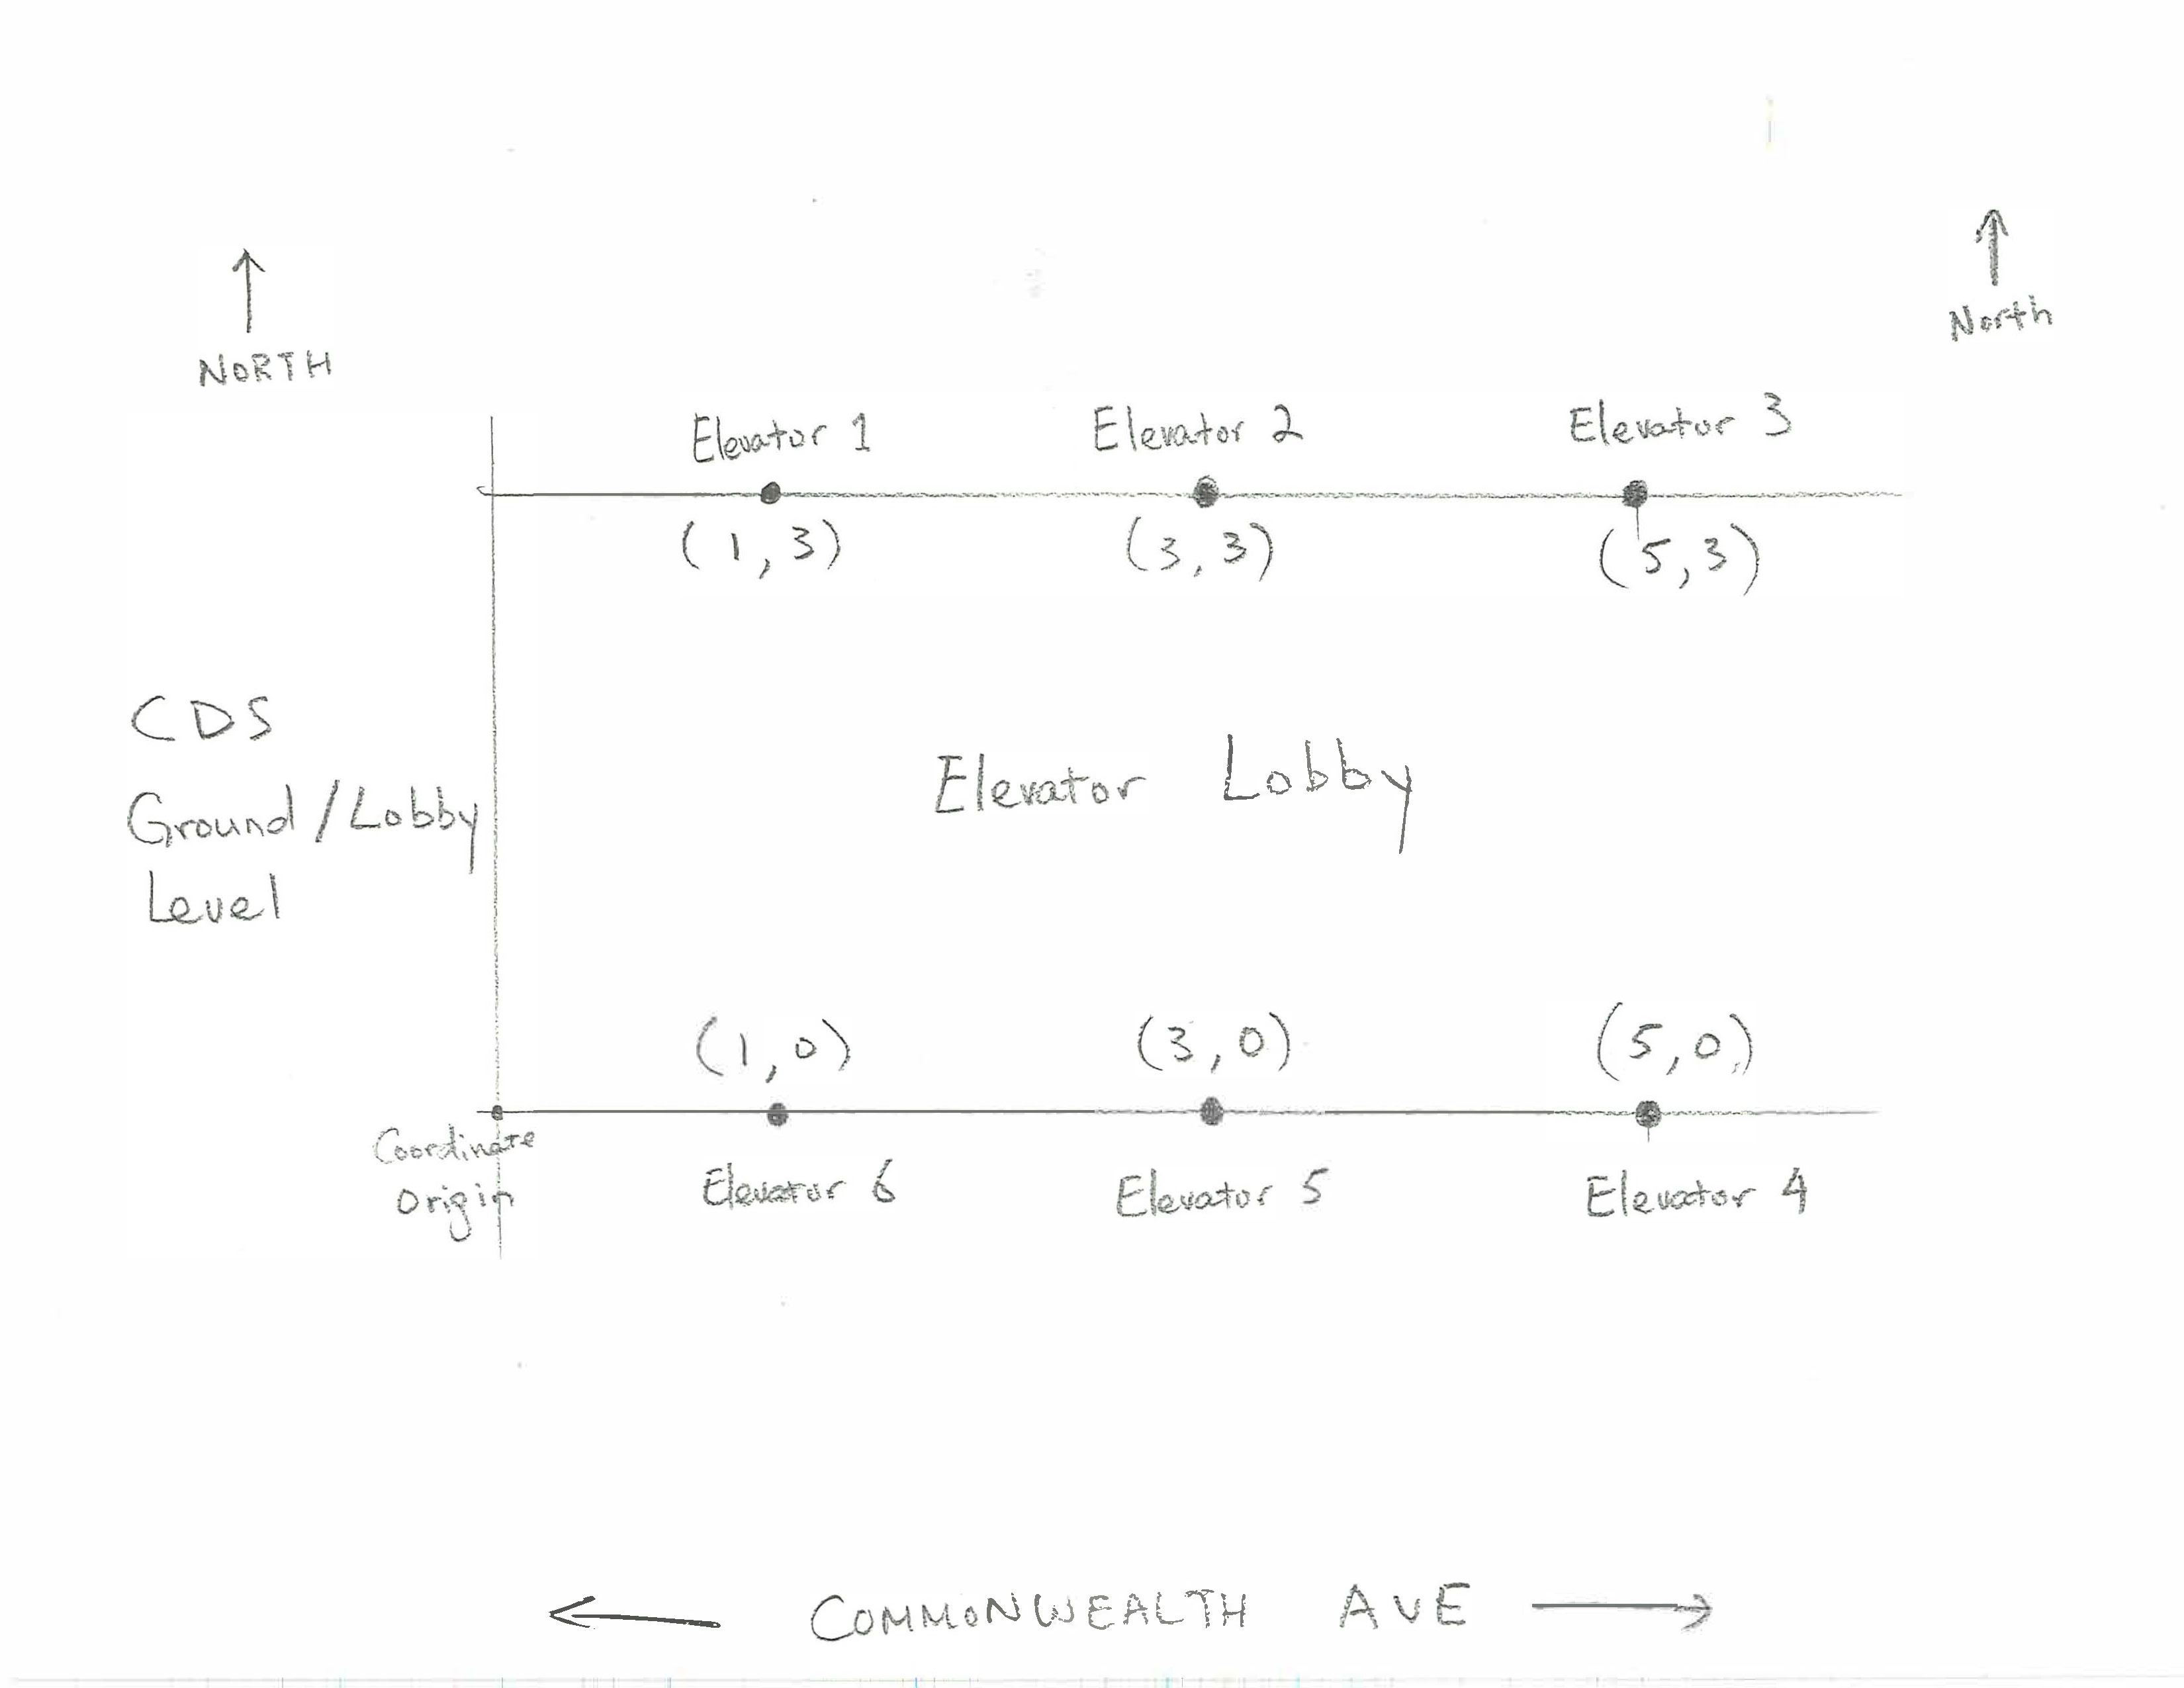

## Part 2: Determining the optimal place to stand

You can start this part after Tuesday 5 pm, when the last training data has been recorded. You are only allowed to use data from Monday 9/16 - Tuesday 9/17 for this part.

Please go to the google spreadsheet linked in the previous part and download the training data as a CSV file. Delete any rows that occur after 9/17. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

**Question 1**: According to the diagram of elevator locations above, where should you wait for an elevator to minimize expected
walking distance to the next elevator to arrive, assuming the next elevator to arrive has an equal chance to be any one of the 6 available elevators? Please express your answer using the coordinate system in the diagram. Briefly justify your answer.

**Answer:**
If we say that every elevator has a same chance of arriving then we should stand at a central coordinate. We can find that point by calculating an average of x and y coordinates of the elevators.

> **average x-coordinate:** (1 + 3 + 5 + 5 + 3 + 1) / 6 = 3

> **average y-coordinate:** (3 + 3 + 3 + 0 + 0 + 0) / 6 = 1.5

So we can conclude the best postiong to stand to minimize the walking distance is at coordinate (3 , 1.5)

**Question 2**: Use a plotting utility (e.g. `matplotlib.pyplot`) to plot the arrival times of elevators on the training data
(Monday 9/16 - Tuesday 9/17). The x-axis should be timestamp and the y-axis should be the elevator ID. I suggest using a scatter plot.
ChatGPT may be useful. Display the plot. List any observations
(e.g. cyclical patterns, some elevators arriving more frequently than others)

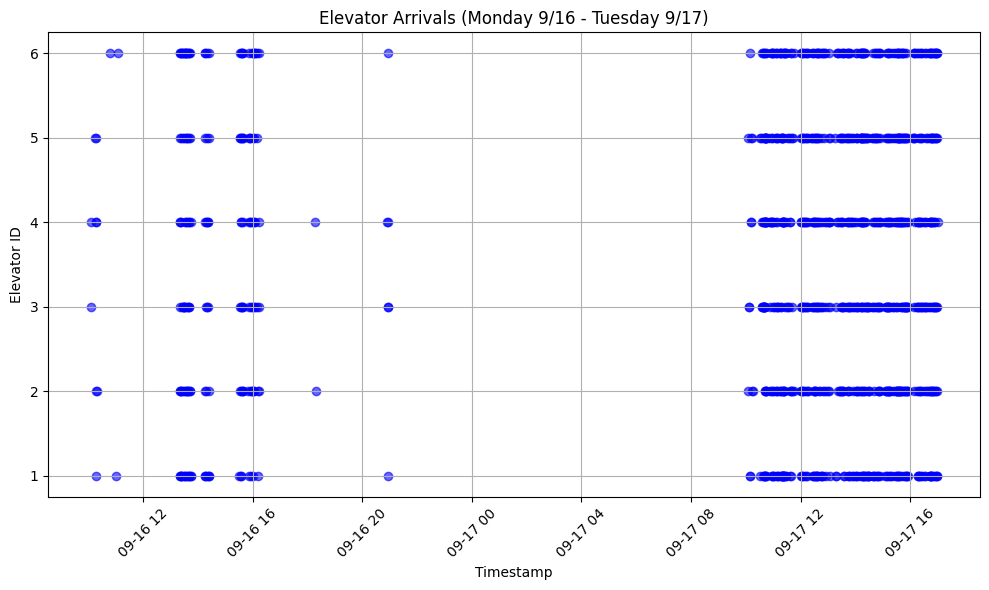

In [2]:
# Code for question 1:
import pandas as pd
import matplotlib.pyplot as plt

def make_plot():
    '''
    You will need to read the training data CSV file and do some processing first.
    '''
    # Read the data (assuming a CSV file with a 'timestamp' and 'elevator_ID' columns)
    data = pd.read_csv('train.csv', delimiter=';')

    # Convert timestamp to datetime format
    data['timestamp'] = pd.to_datetime(data['timestamp'])

    # Filter the data for the relevant date range (Monday 9/16 - Tuesday 9/17)
    data_filtered = data[(data['timestamp'] >= '2024-09-16') & (data['timestamp'] < '2024-09-18')]

    # Create the scatter plot with timestamp on x-axis and elevator_ID on y-axis
    plt.figure(figsize=(10,6))
    plt.scatter(data_filtered['timestamp'], data_filtered['elevator_ID'], color='b', alpha=0.6)
    plt.title('Elevator Arrivals (Monday 9/16 - Tuesday 9/17)')
    plt.xlabel('Timestamp')
    plt.ylabel('Elevator ID')
    plt.xticks(rotation=45)
    plt.grid(True)

    # Display the plot
    plt.tight_layout()
    plt.show()


make_plot()

State observations here (briefly).

1. I don't see any major cyclical patterns in the data.
2. We can see that most data collection was done on 17th.
2. From uniform distribution of points we can see that all elvators are used relatively the same.
3. As stated before distribution is uniform but elevator 3 and 4 have a bit more points.

**Question 3**: Make a table listing the average *frequency*
 for each elevator in arrivals per second.
Based on the table you made, do you think it is optimal
to wait in the location you answered for question 1? Explain why or why not. Note that you will need to process the data to take into account
gaps in the data collection. For example, if no one collected data for 1-2pm, you should subtract that from the total time.

In [13]:
def analyze_arrivals_no_gaps_and_print_table():
    '''
    Analyzes the elevator data, removing gaps in data collection, providing earliest and latest arrival times,
    the average frequency of arrivals per day, and a table of total data collection time, number of arrivals,
    and average frequency per elevator.
    '''

    # Read the data and convert timestamp to datetime format
    data = pd.read_csv('train.csv', delimiter=';')
    data['timestamp'] = pd.to_datetime(data['timestamp'])

    # Filter the data for the relevant date range (Monday 9/16 - Tuesday 9/17)
    data_filtered = data[(data['timestamp'] >= '2024-09-16') & (data['timestamp'] < '2024-09-18')]

    # Define a threshold for gaps in data collection (e.g., 30 minutes)
    time_threshold = pd.Timedelta(minutes=30)

    # Calculate the time difference between consecutive timestamps
    data_filtered['time_diff'] = data_filtered['timestamp'].diff()

    # Filter out periods where the time difference exceeds the threshold (indicating a gap in data collection)
    data_filtered_no_gaps = data_filtered[data_filtered['time_diff'] <= time_threshold].copy()

    # Separate data for each day to get earliest and latest arrival for each specific day
    data_16th = data_filtered_no_gaps[data_filtered_no_gaps['timestamp'].dt.date == pd.Timestamp('2024-09-16').date()]
    data_17th = data_filtered_no_gaps[data_filtered_no_gaps['timestamp'].dt.date == pd.Timestamp('2024-09-17').date()]

    # Find earliest and latest arrivals for both days
    earliest_16th = data_16th['timestamp'].min()
    latest_16th = data_16th['timestamp'].max()
    earliest_17th = data_17th['timestamp'].min()
    latest_17th = data_17th['timestamp'].max()

    print(f"Earliest on 16th: {earliest_16th}, Latest on 16th: {latest_16th}")
    print(f"Earliest on 17th: {earliest_17th}, Latest on 17th: {latest_17th}")

    # Calculate the number of days in the filtered data (since it spans from 9/16 to 9/17, that's 2 days)
    days_in_data = 2

    # Calculate the number of arrivals for each elevator
    elevator_arrivals = data_filtered_no_gaps['elevator_ID'].value_counts().reindex(range(1, 7), fill_value='TODO')

    # Recalculate the average frequency of arrivals per day for each elevator
    elevator_frequency_per_day_no_gaps = elevator_arrivals / days_in_data

    print("\nAverage Frequency of Arrivals per Day (No Gaps):")
    print(elevator_frequency_per_day_no_gaps)

    # Calculate total data collection time in seconds for each elevator
    elevator_start_time = data_filtered_no_gaps.groupby('elevator_ID')['timestamp'].min()
    elevator_end_time = data_filtered_no_gaps.groupby('elevator_ID')['timestamp'].max()
    elevator_total_time = (elevator_end_time - elevator_start_time).dt.total_seconds().reindex(range(1, 7), fill_value='TODO')

    # Calculate the average frequency of arrivals per second
    elevator_frequency_per_second = (elevator_arrivals / elevator_total_time).replace('TODO', 'TODO')

    # Print the table with Total data collection time, Number of arrivals, and Average frequency per second
    table_data = {
        'Elevator ID': list(range(1, 7)),
        'Total data collection time (seconds)': elevator_total_time.values,
        'Number of arrivals': elevator_arrivals.values,
        'Average frequency (arrivals per second)': elevator_frequency_per_second.values
    }

    table_df = pd.DataFrame(table_data)
    print("\nElevator Data Table:")
    print(table_df.to_string(index=False))

# Call the function with the path to the CSV file
analyze_arrivals_no_gaps_and_print_table()

Earliest on 16th: 2024-09-16 10:05:32, Latest on 16th: 2024-09-16 20:56:28
Earliest on 17th: 2024-09-17 10:05:53, Latest on 17th: 2024-09-17 17:00:09

Average Frequency of Arrivals per Day (No Gaps):
elevator_ID
1    76.5
2    81.0
3    85.0
4    82.5
5    83.0
6    79.5
Name: count, dtype: float64

Elevator Data Table:
 Elevator ID  Total data collection time (seconds)  Number of arrivals  Average frequency (arrivals per second)
           1                              110480.0                 153                                 0.001385
           2                              110456.0                 162                                 0.001467
           3                              111206.0                 170                                 0.001529
           4                              110626.0                 165                                 0.001492
           5                              110569.0                 166                                 0.001501
      

**Answer:** I think it still might be optimal because arrivals per second is more or less the same. This means our orignal assumption or uniform arrivals was right meaning the location would shift by much when using method like weighted average. But we need to do testing first to determine that.


| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Total data collection time (seconds) | 110480 | 110456 | 111206 | 110626 | 110569 |108698 |
| Number of arrivals | 153 | 162 | 170 | 165 | 166 |159 |
| Average frequency (arrivals per second) | 0.001385 | 0.001467 | 0.001529 |  0.001492 | 0.001501 |0.001463 |

**Question 4** : Let's say I just arrived in the lobby and have no prior knowledge (e.g. which floor the elevators are currently on or which elevator was the last to arrive).
Using the results from question 3, determine the probability of each elevator being the next to arrive. Present these probabilities in a table and ensure they sum to one. Provide an intuitive explanation to support your answer.

In [15]:
def calculate_arrival_probabilities():
    '''
    Calculates the probability of each elevator being the next to arrive based on their arrival frequency.
    The probabilities are normalized so that they sum to one.
    '''

    # Load and process the data
    data = pd.read_csv('train.csv', delimiter=';')
    data['timestamp'] = pd.to_datetime(data['timestamp'])

    # Filter the data for the relevant date range (Monday 9/16 - Tuesday 9/17)
    data_filtered = data[(data['timestamp'] >= '2024-09-16') & (data['timestamp'] < '2024-09-18')]

    # Define a time gap threshold (30 minutes)
    time_threshold = pd.Timedelta(minutes=30)
    data_filtered['time_diff'] = data_filtered['timestamp'].diff()

    # Filter out gaps in data collection
    data_filtered_no_gaps = data_filtered[data_filtered['time_diff'] <= time_threshold].copy()

    # Calculate the number of arrivals for each elevator
    elevator_arrivals = data_filtered_no_gaps['elevator_ID'].value_counts().reindex(range(1, 7), fill_value=0)

    # Calculate the total number of arrivals
    total_arrivals = elevator_arrivals.sum()

    # Calculate the probability of each elevator being the next to arrive
    arrival_probabilities = elevator_arrivals / total_arrivals

    # Create a DataFrame to display the probabilities
    probability_table = pd.DataFrame({
        'Elevator ID': elevator_arrivals.index,
        'Probability of Next Arrival': arrival_probabilities.values
    })

    # Print the table
    print("\nElevator Arrival Probabilities (Summing to 1):")
    print(probability_table.to_string(index=False))
    print(f"\nSum of Probabilities: {arrival_probabilities.sum()}")

    # Intuitive explanation
    print("\nExplanation:")
    print("The probability of each elevator being the next to arrive is calculated based on the frequency of its arrivals. "
          "Elevators that arrive more frequently have a higher probability of being the next to arrive. Since we have no prior knowledge "
          "about the current positions or status of the elevators, we assume past arrival frequency as the best predictor. "
          "The probabilities sum to one, indicating the certainty that one of the elevators will be the next to arrive.")

# Call the function with the path to the CSV file
calculate_arrival_probabilities()


Elevator Arrival Probabilities (Summing to 1):
 Elevator ID  Probability of Next Arrival
           1                     0.156923
           2                     0.166154
           3                     0.174359
           4                     0.169231
           5                     0.170256
           6                     0.163077

Sum of Probabilities: 1.0

Explanation:
The probability of each elevator being the next to arrive is calculated based on the frequency of its arrivals. Elevators that arrive more frequently have a higher probability of being the next to arrive. Since we have no prior knowledge about the current positions or status of the elevators, we assume past arrival frequency as the best predictor. The probabilities sum to one, indicating the certainty that one of the elevators will be the next to arrive.


**Answer:** We can use average frequency (arrivals per second) to calculate probabilites. I used code above to do that.

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Probability of being next elevator to arrive | 0.156923 | 0.166154 | 0.174359 | 0.169231 | 0.170256 |0.163077 |

**Question 5**: Calculate the optimal location to wait for an elevator based on your answer to the previous question. Give your answer as a coordinate
using the coordinate system of the diagram at the beginning of this assignment. Justify your answer briefly.




In [17]:
def calculate_optimal_waiting_location():
    '''
    Calculates the optimal location to wait for an elevator using a weighted average of
    the elevator coordinates based on their probabilities of arriving next.
    '''

    # Assign fixed coordinates to each elevator (X, Y)
    elevator_coordinates = {
        1: (1, 3),
        2: (3, 3),
        3: (5, 3),
        4: (5, 0),
        5: (3, 0),
        6: (1, 0)
    }

    # Example probabilities from the previous question (modify these based on actual calculations)
    elevator_probabilities = {
          1: 0.156923,
          2: 0.166154,
          3: 0.174359,
          4: 0.169231,
          5: 0.170256,
          6: 0.163077
    }

    # Calculate the weighted average of the X and Y coordinates
    weighted_x = sum(elevator_coordinates[elevator][0] * elevator_probabilities[elevator] for elevator in elevator_coordinates)
    weighted_y = sum(elevator_coordinates[elevator][1] * elevator_probabilities[elevator] for elevator in elevator_coordinates)

    # Print the optimal waiting location
    optimal_location = (weighted_x, weighted_y)
    print(f"\nOptimal Waiting Location: {optimal_location}")

# Call the function to calculate the optimal waiting location
calculate_optimal_waiting_location()


Optimal Waiting Location: (3.04718, 1.492308)


**Answer:**
>**Optimal Waiting Location:** (3.04718, 1.492308)

**Justification:** As said before to calculate new optimal we need to use weighted average of each coordinate. This method ensures that elevators with higher probability of arrival will get a bigger influence which ensure saving time.

**Question 6**: On the training data, calculate the average distance traveled to the next elevator arrival if I wait at the location specified in question 1.
Then, calculate the average distance traveled if I wait at the location specified in question 5.

*Your answer to question 5 should result in a shorter average distance traveled.*

You are free to write your own code for these calculations, but we recommend implementing a function called `get_average_walk_distance(data, coordinate)`, since you will need to reuse this function.



In [32]:
import numpy as np

# Function to calculate Euclidean distance
def calculate_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# Function to calculate the average walking distance to the next elevator arrival
def get_average_walk_distance(data, coordinate):
    '''
    Calculates the average distance traveled to the next elevator arrival from a given coordinate.
    The coordinate can be either the location from question 1 or question 5.
    '''
    # Assign fixed coordinates to each elevator (X, Y)
    elevator_coordinates = {
        1: (1, 3),
        2: (3, 3),
        3: (5, 3),
        4: (5, 0),
        5: (3, 0),
        6: (1, 0)
    }

    # Calculate the distance for each arrival
    distances = []
    for elevator_id in data['elevator_ID']:
        elevator_location = elevator_coordinates[elevator_id]
        distance = calculate_distance(coordinate, elevator_location)
        distances.append(distance)

    # Calculate the average distance
    average_distance = np.mean(distances)
    return average_distance

data = pd.read_csv('train.csv', delimiter=';')


question_1_location = (3, 1.5)
average_distance_q1 = get_average_walk_distance(data, question_1_location)
print(f"Average distance when waiting at the location from Question 1: {average_distance_q1:.5f} units")

question_5_location = ((3.04718, 1.492308))
average_distance_q5 = get_average_walk_distance(data, question_5_location)
print(f"Average distance when waiting at the optimal location from Question 5: {average_distance_q5:.5f} units")

print("\nQuestion 5 wait location is better:", average_distance_q5 < average_distance_q1)

Average distance when waiting at the location from Question 1: 2.16463 units
Average distance when waiting at the optimal location from Question 5: 2.16402 units

Question 5 wait location is better: True


**Answer:**
- **Average distance when waiting at the location from Question 1:** 2.16463 units
- **Average distance when waiting at the optimal location from Question 5:** 2.16402 units

## Part 3: Testing on evaluation data

You can start this part after Thursday 5 pm, when the last test data has been recorded.

Please go to the google spreadsheet linked in part 1 and download the data as a CSV file. Delete any rows that occurred before 9/18, since we used this for training already. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

Use the `get_average_walk_distance` function you wrote for Part 2 Question 6 to calculate the average distance traveled to the next elevator arrival on the test data for both the coordinate specified in question 1 and the coordinate specified in question 5. Then, organize the numbers using the following table:

|Average Distance Walked (m) | Training Data | Test Data |
|----------------------------|---------------|-----------|
|Naive position (Question 1) | 2.16463 |   2.16379 |
|Smart position (Question 5) | 2.16402 |   2.16347 |

Did you succeed in finding a good location to wait for the elevators? If not, explain what might have gone wrong.

**Answer:** I did succeed in finding the optimal placement to minimize the walking distance even though difference is minimal.

In [34]:
# Load the new test (evaluation) data
evaluation_data = pd.read_csv('test.csv', delimiter=';')

# Filter out rows before 9/18
evaluation_data['timestamp'] = pd.to_datetime(evaluation_data['timestamp'])
evaluation_data = evaluation_data[evaluation_data['timestamp'] >= '2024-09-18']

# Use the same function to calculate the average walking distance for both locations

# Wait at the location from Question 1
question_1_location = (3, 1.5)
average_distance_q1 = get_average_walk_distance(evaluation_data, question_1_location)
print(f"Average distance when waiting at the location from Question 1: {average_distance_q1:.5f} units")

# Wait at the optimal location from Question 5
question_5_location = (3.04718, 1.492308)  # Replace with actual location from Question 5
average_distance_q5 = get_average_walk_distance(evaluation_data, question_5_location)
print(f"Average distance when waiting at the optimal location from Question 5: {average_distance_q5:.5f} units")

# Compare which location results in a shorter average distance
print("\nQuestion 5 wait location is better:", average_distance_q5 < average_distance_q1)

Average distance when waiting at the location from Question 1: 2.16379 units
Average distance when waiting at the optimal location from Question 5: 2.16347 units

Question 5 wait location is better: True
